Course 5: Data science with Python/
Task 2- Prepare and Explore the Data. ELT

1. Import and Prepare the Data

In [81]:
#libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.integrate import trapz
from pandas import Series, DataFrame

In [82]:
#Dataframe
credit = pd.read_csv('default of credit card clients.csv', header =0)

In [83]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [84]:
#simply view a quick sample the dataframe
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
#describe() function (like summary R)
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [86]:
#data types 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [87]:
#Data cleaning: Data transformation, Data reduction, Data discretization, Text cleaning 
credit['ID']= credit['ID'].astype('str')
credit['LIMIT_BAL']= credit['LIMIT_BAL'].astype('float')
credit['SEX']= credit['SEX'].astype('str')
credit['EDUCATION']= credit['EDUCATION'].astype('str')
credit['MARRIAGE']= credit['MARRIAGE'].astype('str')
credit['AGE']= credit['AGE'].astype('str')
credit['PAY_0']= credit['PAY_0'].astype('str')
credit['PAY_2']= credit['PAY_2'].astype('str')
credit['PAY_3']= credit['PAY_3'].astype('str')
credit['PAY_4']= credit['PAY_4'].astype('str')
credit['PAY_5']= credit['PAY_5'].astype('str')
credit['PAY_6']= credit['PAY_6'].astype('str')
credit['BILL_AMT1']= credit['BILL_AMT1'].astype('float')
credit['BILL_AMT2']= credit['BILL_AMT2'].astype('float')
credit['BILL_AMT3']= credit['BILL_AMT3'].astype('float')
credit['BILL_AMT4']= credit['BILL_AMT4'].astype('float')
credit['BILL_AMT5']= credit['BILL_AMT5'].astype('float')
credit['BILL_AMT6']= credit['BILL_AMT6'].astype('float')
credit['PAY_AMT1']= credit['PAY_AMT1'].astype('float')
credit['PAY_AMT2']= credit['PAY_AMT2'].astype('float')
credit['PAY_AMT3']= credit['PAY_AMT3'].astype('float')
credit['PAY_AMT4']= credit['PAY_AMT4'].astype('float')
credit['PAY_AMT5']= credit['PAY_AMT5'].astype('float')
credit['PAY_AMT6']= credit['PAY_AMT6'].astype('float')
credit['default payment next month']= credit['default payment next month'].astype('str')


credit
credit.dtypes

ID                             object
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                            object
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
dtype: object

2. Perform Exploratory Data Analysis

2.1.Visualizing the data

In [88]:
#Histograms (useful for understanding how the data is distributed in any given single variable)
#import matplotlib library (major visualizations)

In [89]:
#column names in our dataframe
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


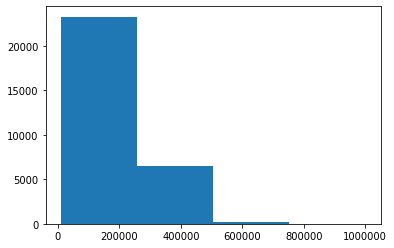

In [90]:
# histogram (using .hist method of matplotlib, ex. 'LIMIT_BAL' variable, bins)
plt.hist(credit['LIMIT_BAL'], bins = 4)
plt.show()

In [91]:
# histogram you can continue your EDA 

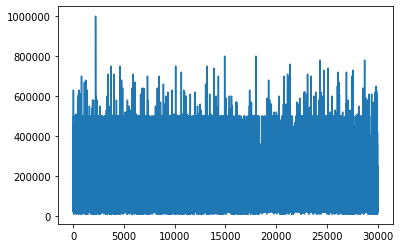

In [92]:
#Line Plots (illustrate the range and mode of any given numerical variable)
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [93]:
#Scatter Plots (very useful for comparing two features)
#set the two features equal to variables
x = credit['PAY_0']
y = credit['PAY_2']

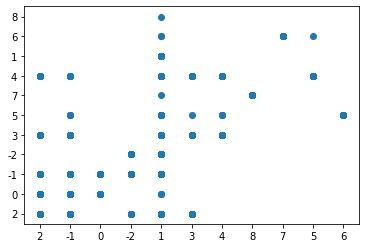

In [94]:
# use matplotlib to create the scatter plot using the two variables for the X and Y axes 
plt.scatter(x,y)
plt.show()

In [95]:
#Box Plots (very useful for quickly visualizing where the bulk of the data is in any given feature ad are also very useful for identifying feature with outliers or extreme variances in the observations) 
#create box plots in matlotlib
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


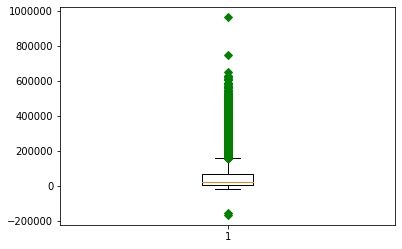

In [96]:
#build a plot plot with one of the features in our data
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

2.2.Correlation

In [97]:
# pandas or even numpy
# basic correlation coefficient matrix using pandas
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
LIMIT_BAL   1.000000   0.285430   0.278314   0.283236   0.293988   0.295562   
BILL_AMT1   0.285430   1.000000   0.951484   0.892279   0.860272   0.829779   
BILL_AMT2   0.278314   0.951484   1.000000   0.928326   0.892482   0.859778   
BILL_AMT3   0.283236   0.892279   0.928326   1.000000   0.923969   0.883910   
BILL_AMT4   0.293988   0.860272   0.892482   0.923969   1.000000   0.940134   
BILL_AMT5   0.295562   0.829779   0.859778   0.883910   0.940134   1.000000   
BILL_AMT6   0.290389   0.802650   0.831594   0.853320   0.900941   0.946197   
PAY_AMT1    0.195236   0.140277   0.280365   0.244335   0.233012   0.217031   
PAY_AMT2    0.178408   0.099355   0.100851   0.316936   0.207564   0.181246   
PAY_AMT3    0.210167   0.156887   0.150718   0.130011   0.300023   0.252305   
PAY_AMT4    0.203242   0.158303   0.147398   0.143405   0.130191   0.293118   
PAY_AMT5    0.217202   0.167026   0.157957   0.17971

2.3.Covariance

In [98]:
# calculate covariance in Pandas 
covMat = credit.cov()
print(covMat)

              LIMIT_BAL     BILL_AMT1     BILL_AMT2     BILL_AMT3  \
LIMIT_BAL  1.683446e+10  2.727020e+09  2.570130e+09  2.548533e+09   
BILL_AMT1  2.727020e+09  5.422240e+09  4.986670e+09  4.556511e+09   
BILL_AMT2  2.570130e+09  4.986670e+09  5.065705e+09  4.582086e+09   
BILL_AMT3  2.548533e+09  4.556511e+09  4.582086e+09  4.809338e+09   
BILL_AMT4  2.453926e+09  4.075286e+09  4.086508e+09  4.122238e+09   
BILL_AMT5  2.331481e+09  3.714795e+09  3.720401e+09  3.726780e+09   
BILL_AMT6  2.243837e+09  3.519876e+09  3.524868e+09  3.524247e+09   
PAY_AMT1   4.195711e+08  1.710894e+08  3.305146e+08  2.806565e+08   
PAY_AMT2   5.333504e+08  1.685692e+08  1.653859e+08  5.064226e+08   
PAY_AMT3   4.801180e+08  2.034048e+08  1.888731e+08  1.587478e+08   
PAY_AMT4   4.131202e+08  1.826164e+08  1.643518e+08  1.558003e+08   
PAY_AMT5   4.305657e+08  1.879091e+08  1.717652e+08  1.904126e+08   
PAY_AMT6   5.065153e+08  2.347681e+08  2.204845e+08  2.247817e+08   

              BILL_AMT4     BILL_

3.Own EDA

In [99]:
#sns

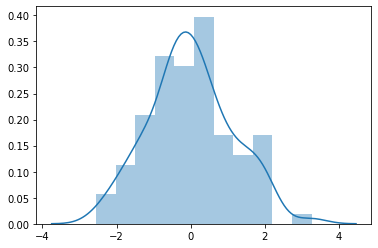

In [100]:
#Plotting univariate distributions (displot)
x = credit['LIMIT_BAL']
y = credit['default payment next month']

credit = np.random.normal(size=100)
sns.distplot(credit)

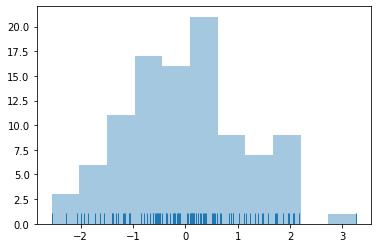

In [101]:
#Histograms¶
sns.distplot(credit, kde=False, rug=True);

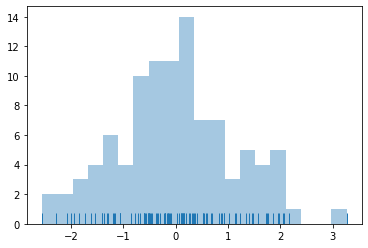

In [102]:
sns.distplot(credit, bins=20, kde=False, rug=True);

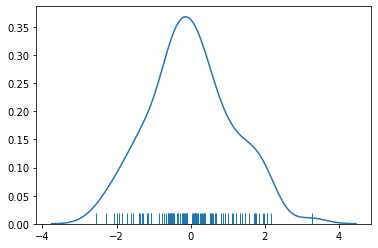

In [103]:
#Kernel density estimation¶
sns.distplot(credit, hist=False, rug=True);

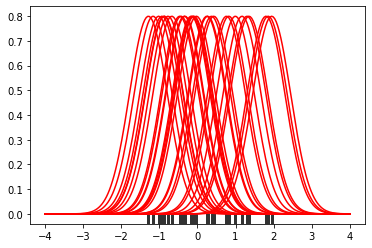

In [104]:
credit = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * credit.std() * credit.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for credit_i in credit:

    kernel = stats.norm(credit_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(credit, color=".2", linewidth=3)

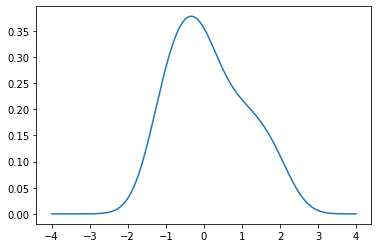

In [105]:
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

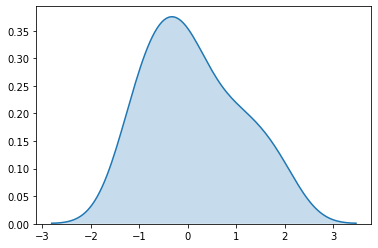

In [106]:
sns.kdeplot(credit, shade=True)

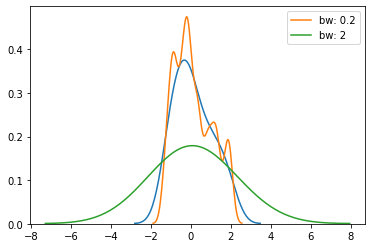

In [107]:
sns.kdeplot(credit)
sns.kdeplot(credit, bw=.2, label="bw: 0.2")
sns.kdeplot(credit, bw=2, label="bw: 2")
plt.legend()

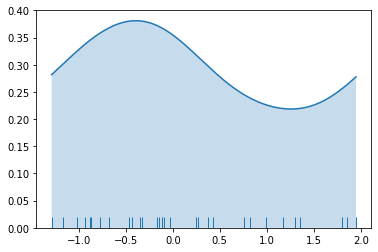

In [108]:
sns.kdeplot(credit, shade=True, cut=0)
sns.rugplot(credit)

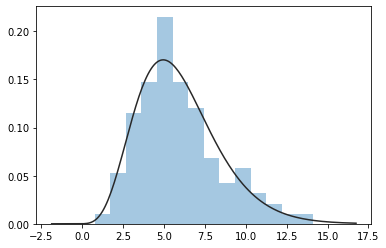

In [109]:
#Fitting parametric distributions¶
credit = np.random.gamma(6, size=200)
sns.distplot(credit, kde=False, fit=stats.gamma)